# Project: TMDB-Movies Dataset Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

[TMDB-Movies](https://www.themoviedb.org/) is The movie database(TMDb). This database is community built movies and TV database. In this database have many movies and features, but I use following properties:

    * popularity
    * budget_adj
    * revenue_adj
    * keywords
    * genres
    * release_date
    
In this report, I explore the following questions:

    * How has the profitability of making films changed over time?
    * When do movies of each genre or keyword make the best profits?
    
Throughout my analysis film profitability and popularity will be dependent variables, while release date, budget, genres, and keywords will be independent variables.


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline
plt.style.use('seaborn')

<a id='wrangling'></a>
## Data Wrangling
In data wrangling step, I want to collect some meaningful columns and change to useful data types.

* Remove unuseful columns
* Change `release_date` format to `datetime

### General Properties
First of all I want to what kind of data in this dataset. See some rows and described table.

In [2]:
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# Remove unusefule columns
df = pd.DataFrame(df, columns = ['popularity', 'budget_adj', 'revenue_adj', 'keywords', 'genres', 'release_date'])
df.keys()

Index(['popularity', 'budget_adj', 'revenue_adj', 'keywords', 'genres',
       'release_date'],
      dtype='object')

In [6]:
# Change `release_date`
print(df['release_date'].dtype)
df['release_date'] = pd.to_datetime(df['release_date'])
print(df['release_date'].dtype)

object
datetime64[ns]


### Data Cleaning
Dataset have some null data, therefore I clean some columns. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   popularity    10866 non-null  float64       
 1   budget_adj    10866 non-null  float64       
 2   revenue_adj   10866 non-null  float64       
 3   keywords      9373 non-null   object        
 4   genres        10843 non-null  object        
 5   release_date  10866 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 509.5+ KB


There are null data in `keywords` and `genres`. These columns cannot fill any estimated value(because these are string type), then I remove some rows which are included null data.

In [8]:
# remove null data
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9368 entries, 0 to 10865
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   popularity    9368 non-null   float64       
 1   budget_adj    9368 non-null   float64       
 2   revenue_adj   9368 non-null   float64       
 3   keywords      9368 non-null   object        
 4   genres        9368 non-null   object        
 5   release_date  9368 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 512.3+ KB


<a id='eda'></a>
## Exploratory Data Analysis


array([[<AxesSubplot:xlabel='popularity', ylabel='popularity'>,
        <AxesSubplot:xlabel='budget_adj', ylabel='popularity'>,
        <AxesSubplot:xlabel='revenue_adj', ylabel='popularity'>],
       [<AxesSubplot:xlabel='popularity', ylabel='budget_adj'>,
        <AxesSubplot:xlabel='budget_adj', ylabel='budget_adj'>,
        <AxesSubplot:xlabel='revenue_adj', ylabel='budget_adj'>],
       [<AxesSubplot:xlabel='popularity', ylabel='revenue_adj'>,
        <AxesSubplot:xlabel='budget_adj', ylabel='revenue_adj'>,
        <AxesSubplot:xlabel='revenue_adj', ylabel='revenue_adj'>]],
      dtype=object)

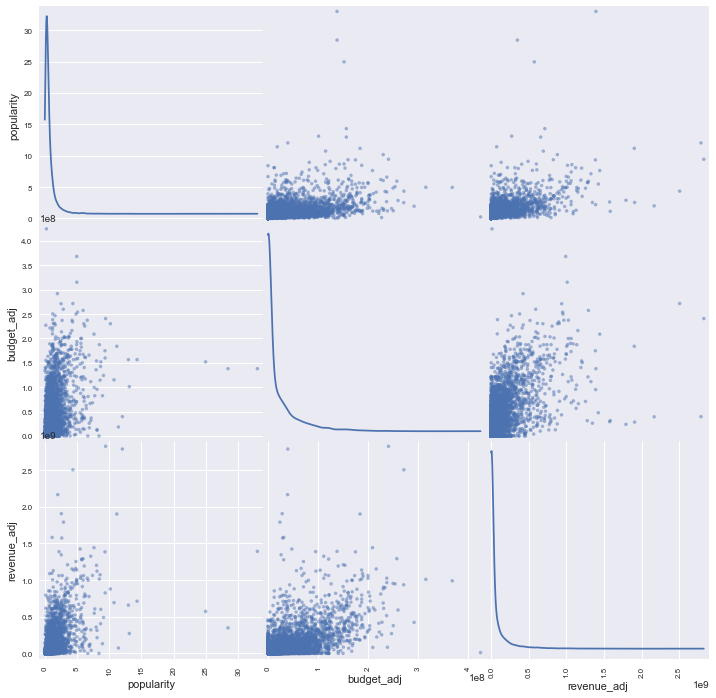

In [10]:
pd.plotting.scatter_matrix(df, figsize = (12, 12), diagonal = 'kde')

### Research Question 1: Which variables are highly correlated to revenue?

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats

df_woString = pd.DataFrame()
for c in df.keys():
    if (df[c].dtype != object and c != 'release_date'):
        df_woString[c] = df[c]

std_scaler = MinMaxScaler()
fitted = std_scaler.fit_transform(df_woString)
df_scaled = pd.DataFrame(fitted, columns = df_woString.columns, index = list(df.index.values))

comparisons = ['budget_adj', 'runtime', 'score', 'popularity']
ax = None
for c in comparisons:
    j = sns.jointplot(x = 'revenue_adj', y = c, data = df_scaled, height = 10, ax = ax, kind = 'reg')
    slope, intercept, rvalue, pvalue, stderr = stats.linregress(j.x, j.y)
    buf = "slope = {:4f}, inter = {:4f}, r = {:4f}, \np = {:4f}, stderr = {:4f}".format(slope, intercept, rvalue, pvalue, stderr)
    j.ax_joint.text(0, 0, buf, fontsize = 20)

### Research Question 2  (Which genres have a good revenue over budget?)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

df2 = pd.DataFrame(df.explode('genres'), columns = ['genres', 'release_year', 'revenue'])

# revenue top 5 genres!
genres = df2.groupby('genres').mean()['revenue'].sort_values(ascending = True).head(5).keys()

fig, ax = plt.subplots(3,1, figsize = (10, 10))
ax_1 = ax[0]
ax_2 = ax[0].twinx()

color = 'tab:red'
ax_1.plot(df2.groupby('release_year')['revenue'].mean(), label = 'mean', color = color)
ax_1.set_ylabel('revenue mean', color = color)
ax_1.tick_params(labelcolor = color)
ax_1.grid(axis = 'y')
color = 'tab:blue'
ax_2.plot(df2.groupby('release_year')['revenue'].mean() / df2.groupby('release_year')['revenue'].count(), label = 'mean per count', color = color)
ax_2.set_ylabel('revenue mean per count', color = color)
ax_2.tick_params(labelcolor = color)
ax_2.grid(axis = 'y')
for genre in genres:
    ax[1].plot(df2[df2['genres'] == genre].groupby('release_year')['genres'].count(), label = genre)
    ax[2].plot(df2[df2['genres'] == genre].groupby('release_year')['revenue'].sum(), label = genre)

ax[1].legend()
ax[1].set_ylabel('count')
ax[2].legend()
ax[2].set_ylabel('revenue all movies')

### Research Question 3 (How much is the film industry paying attention to political correctness?)

In [ ]:
fig, ax = plt.subplots(nrows = 2, figsize = (12, 6), gridspec_kw={"height_ratios":[9,1]})
df.explode('keywords').query('keywords == "woman director"').groupby('release_year')['id'].count().plot(ax = ax[0])
ax[1].axis('off')
fig.text(0.3, 0.1, "Count of Movie Keyword Is Woman Director", fontdict={"fontsize":16, "fontweight":"bold", "color":"k"})



<a id='conclusions'></a>
## Question1: Which variables are highly correlated to revenue?
* `budget_adj` is highest correlated value, but `budget_adj` is very scattered(slope = 1.02, r = 0.64)
* `runtime` is most uncorrelated value, but it distributed in dense area

## Question2: Which genres have a good revenue over budget?
* Mean of revenue of movies is increase to 1e7 ~ 6e7 about 600 %
* Mean of revenue per movie is decrease
* TV movies, one of the movie `genres`, are being made more and more, and more than 80 TV movies are made every year after 2010
* Horror movies have the largest total revenue by movie `genres`

## Question3: How much is the film industry paying attention to political correctness?
* Movies which have "woman director" keyword are being made more and more, especially after 2000's

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])